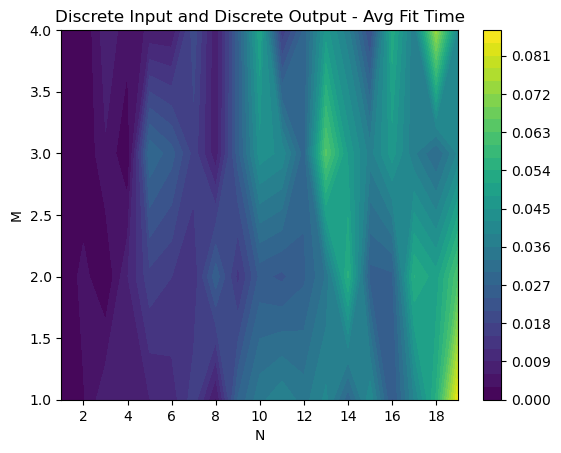

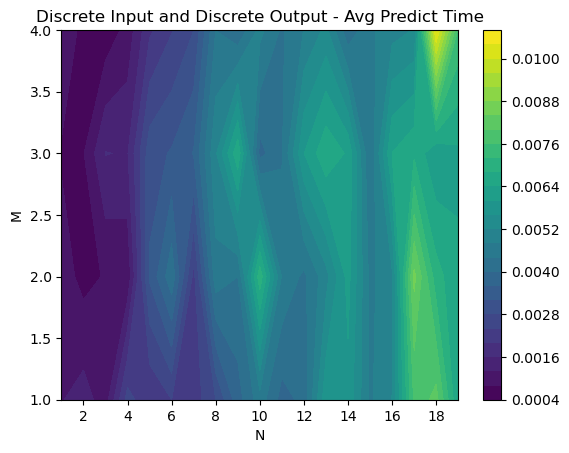

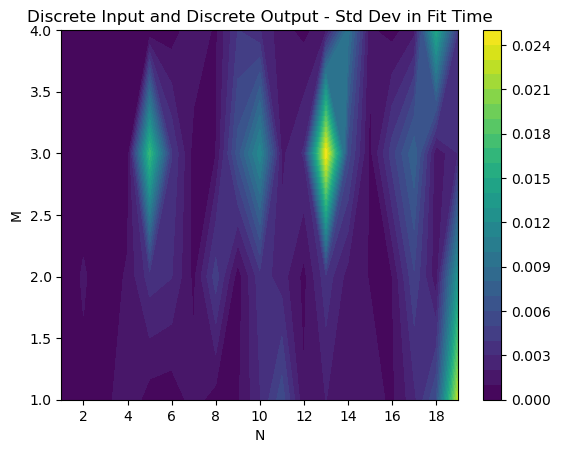

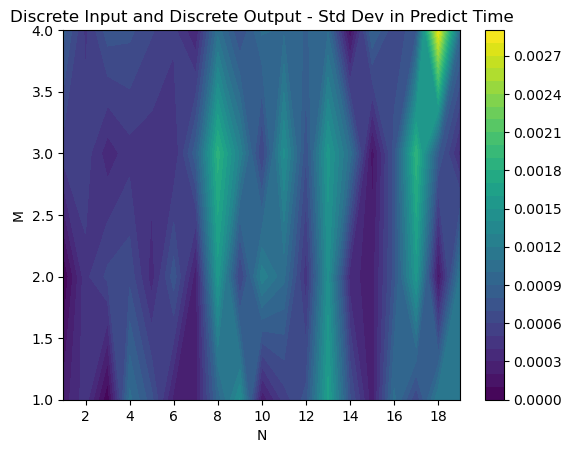

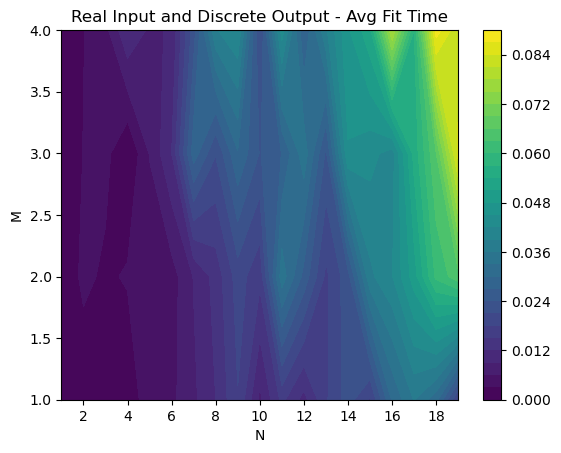

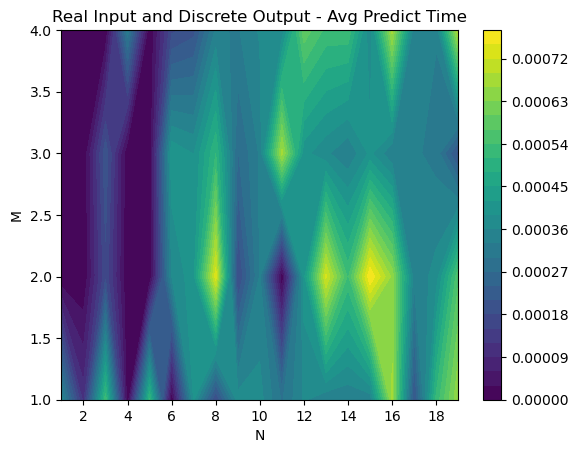

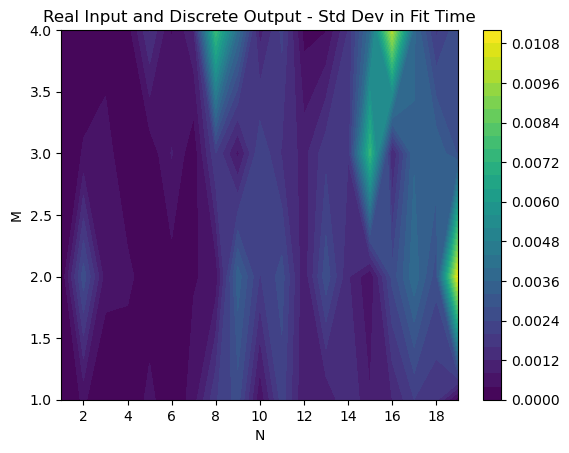

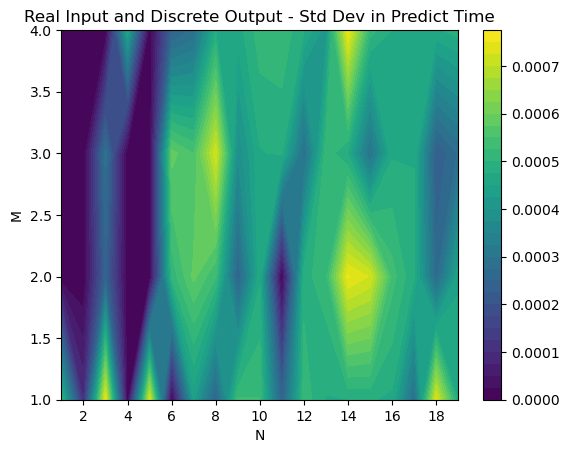

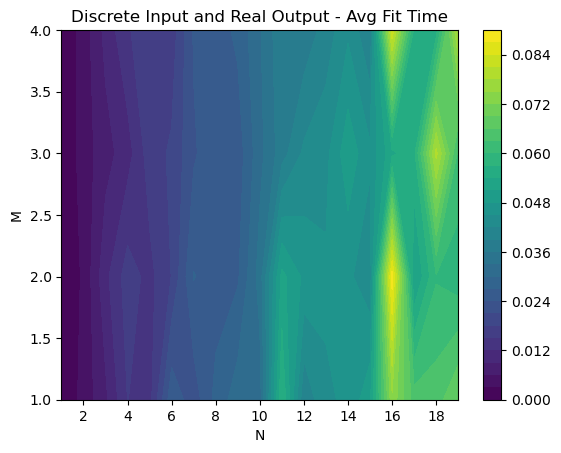

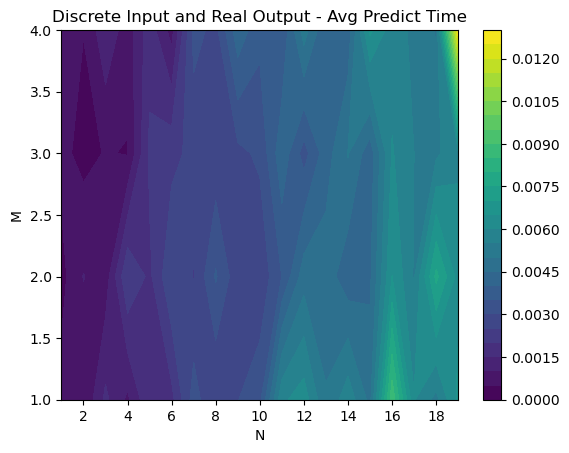

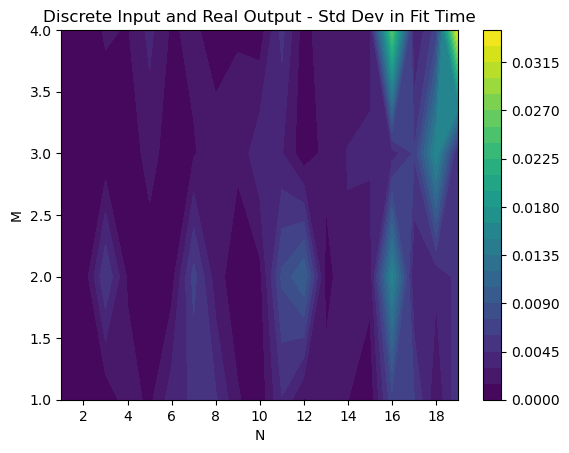

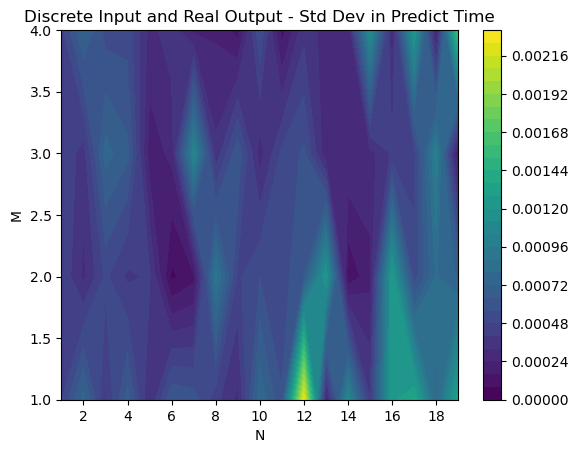

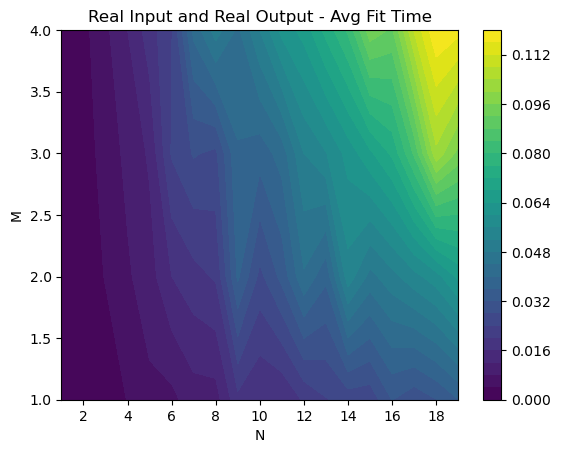

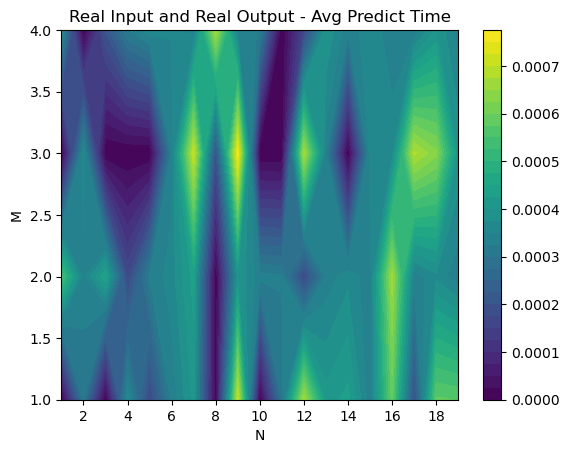

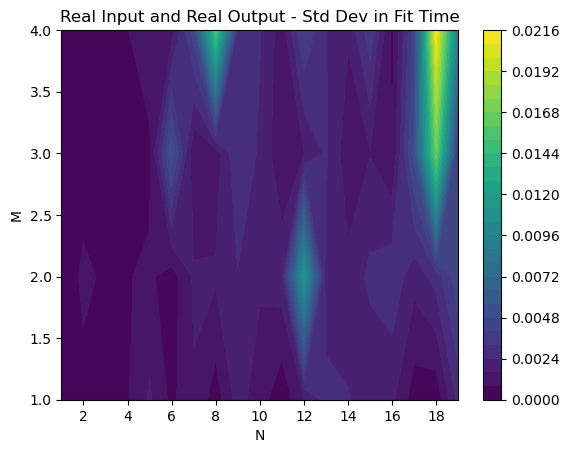

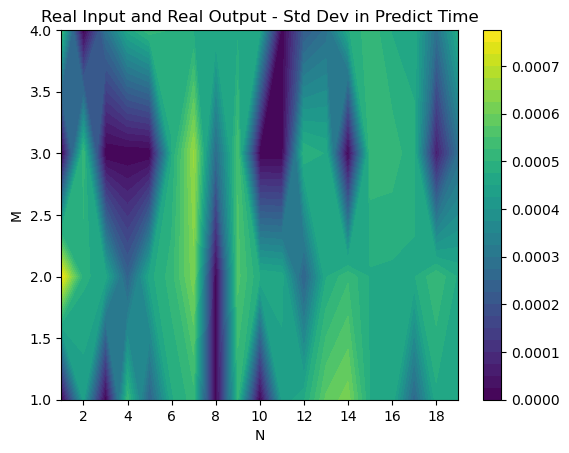

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from typing import Literal

np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values


# Function to create fake data (take inspiration from usage.py)
# ...
# Function to calculate average time (and std) taken by fit() and predict() for different N and P for 4 different cases of DTs
# ...
# Function to plot the results
# ...
# Other functions
# ...
# Run the functions, Learn the DTs and Show the results/plots

input_output_dictionary = {
	'RR': 'Real Input and Real Output',
	'DD': 'Discrete Input and Discrete Output',
	'RD': 'Real Input and Discrete Output',
	'DR': 'Discrete Input and Real Output'
}

def create_dataset(N: int, M: int, dataset_type: Literal['RR', 'DD', 'RD', 'DR']):

	if dataset_type[0] == 'R':
		X = pd.DataFrame(np.random.randn(N, M))
	else:
		X = pd.DataFrame({i:pd.Series(np.random.randint(2, size = N), dtype="category") for i in range(5)})

	if dataset_type[1] == 'R':
		y = pd.Series(np.random.randn(N))
	else:
		y = pd.Series(np.random.randint(2, size = N), dtype="category")
	
	return X, y

# calculate average time taken by fit() and predict() for different N and P for 4 different cases of dataset_type s
def calculate_average_time(N: int, M: int, iterations: int, dataset_type: Literal['RR', 'DD', 'RD', 'DR']):
	
	# create dataset
	X, y = create_dataset(N, M, dataset_type)

	# calculate average time taken by fit()
	temp = []
	for i in range(iterations):
		start = time.time()
		tree = DecisionTree(criterion='information_gain', max_depth=5)
		tree.fit(X, y)
		end = time.time()
		temp.append(end-start)
	avg_fit_time = np.mean(temp)
	stdDev_fit_time = np.std(temp)

	temp = []
	# calculate average time taken by predict()
	for i in range(iterations):
		start = time.time()
		y_hat = tree.predict(X)
		end = time.time()
		temp.append(end-start)
	avg_predict_time = np.mean(temp)
	stdDev_predict_time = np.std(temp)

	return avg_fit_time, avg_predict_time, stdDev_fit_time, stdDev_predict_time
``

# Plot average time taken by fit() and predict()
def plot_results(n: int, m: int, iterations: int, dataset_type: Literal['RR', 'DD', 'RD', 'DR']):
	N = np.arange(1, n, 1)
	M = np.arange(1, m, 1)

	avg_fit_time = []
	std_fit_time = []
	avg_predict_time = []
	std_predict_time = []

	for i in N:
		temp_fit_time = []
		temp_std_fit_time = []
		temp_predict_time = []
		temp_std_predict_time = []
		for j in M:
			outputTimes  = calculate_average_time(i, j, iterations, dataset_type)
			temp_fit_time.append(outputTimes[0])
			temp_predict_time.append(outputTimes[1])
			temp_std_fit_time.append(outputTimes[2])
			temp_std_predict_time.append(outputTimes[3])

		avg_fit_time.append(temp_fit_time)
		avg_predict_time.append(temp_predict_time)
		std_fit_time.append(temp_std_fit_time)
		std_predict_time.append(temp_std_predict_time)

	[M,N] = np.meshgrid(M,N)
	fig, ax = plt.subplots(1,1)
	cp = ax.contourf(N, M, avg_fit_time, levels=30)
	fig.colorbar(cp)
	ax.set_title(input_output_dictionary[dataset_type] + ' - Avg Fit Time')
	ax.set_xlabel('N')
	ax.set_ylabel('M')
	plt.savefig(f'img/{dataset_type}_fit_time.png')

	fig, ax = plt.subplots(1,1)
	cp = ax.contourf(N, M, avg_predict_time, levels=30)
	fig.colorbar(cp)
	ax.set_title(input_output_dictionary[dataset_type] + ' - Avg Predict Time')
	ax.set_xlabel('N')
	ax.set_ylabel('M')
	
	plt.savefig(f'img/{dataset_type}_pred_time.png')

	fig, ax = plt.subplots(1,1)
	cp = ax.contourf(N, M, std_fit_time, levels=30)
	fig.colorbar(cp)
	ax.set_title(input_output_dictionary[dataset_type] + ' - Std Dev in Fit Time')
	ax.set_xlabel('N')
	ax.set_ylabel('M')
	plt.savefig(f'img/{dataset_type}_std_fit_time.png')

	fig, ax = plt.subplots(1,1)
	cp = ax.contourf(N, M, std_predict_time, levels=30)
	fig.colorbar(cp)
	ax.set_title(input_output_dictionary[dataset_type] + ' - Std Dev in Predict Time')
	ax.set_xlabel('N')
	ax.set_ylabel('M')
	plt.savefig(f'img/{dataset_type}_std_pred_time.png')

# Plot for all four cases of dataset_type with N from 1 to 20 and M from 1 to 10 with average over 3 iterations
plot_results(20, 5, 3, 'DD')
plot_results(20, 5, 3, 'RD')
plot_results(20, 5, 3, 'DR')
plot_results(20, 5, 3, 'RR')